# How to define compute magnetic flux with FEMM

This tutorial shows the how to **compute magnetic flux and torque with FEMM**.  
 
The notebook related to this tutorial is available on [GitHub](https://github.com/Eomys/pyleecan/tree/master/Tutorials/tuto_Simulation_FEMM.ipynb).


This tutorial is divided into four parts: 
- machine import
- winding definition
- magnetic simulation definition and running
- plot of the magnetic flux for the first time step

### Loading Machine

Before defining the simulation, one first has to define the machine. For this example we import the Toyota Prius 2004 defined in [this tutorial](https://www.pyleecan.org/tuto_Machine.html).

<IPython.core.display.Javascript object>


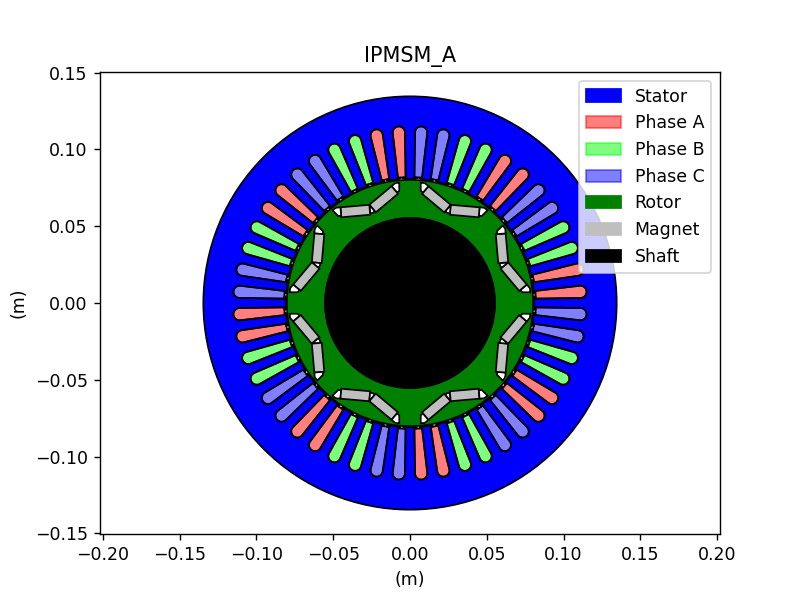

In [1]:
# Add pyleecan to the Python path
import sys
sys.path.append('../..')

from pyleecan.Functions.load import load
# from pyleecan.Tests.Validation.Machine.SPMSM_003 import SPMSM_003 as IPMSM_A
# from pyleecan.Tests.Validation.Machine.IPMSM_A import IPMSM_A as IPMSM_A
# Import the machine from a script
IPMSM_A = load('../Data/Machine/IPMSM_A.json')
%matplotlib notebook
im=IPMSM_A.plot()

## Simulation definition
### Input currents

To define the simulation, we use [Simu1](http://www.pyleecan.com/pyleecan.Classes.Simu1.html) and [InCurrent](http://www.pyleecan.com/pyleecan.Classes.InCurrent.html) to define the input such as stator currents, the angular and the time discretization. 

In [2]:
import numpy as np 
from numpy import ones, pi, array, linspace
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InCurrent import InCurrent
from pyleecan.Classes.MagFEMM import MagFEMM

# Create the Simulation
mySimu = Simu1(name="EM_SIPMSM_AL_001", machine=IPMSM_A)   

# Defining Simulation Input
mySimu.input = InCurrent()

#  Electrical time vector without symmetry [s]
mySimu.input.time.value= np.linspace(start=0, stop=0, num=1, endpoint=False)

# Angular steps along the airgap circonference for flux density calculation
mySimu.input.angle.value = np.linspace(start = 0, stop = 2*np.pi, num=2048, endpoint=False) # 2048 steps 

# Rotor speed as a function of time [rpm]
mySimu.input.Nr.value = ones(1) * 2504

# Stator currents as a function of time, each column correspond to one phase [A]
mySimu.input.Is.value = array(
    [
        [0, 12.2474, -12.2474],
    ]
)


To call FEMM, we need to define the magnetic part of the simulation with [MagFEMM](http://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) class. As the simulation will only consider magnetic problem, we set the structural part as None to avoid computation.


In [6]:
from pyleecan.Classes.MagFEMM import MagFEMM
# Definition of the magnetic simulation (is_mmfr=False => no flux from the magnets)
mySimu.mag = MagFEMM(
    is_stator_linear_BH=0, # 0 to use the B(H) curve, 
                           # 1 to use linear B(H) curve according to mur_lin,
                           # 2 to enforce infinite permeability (mur_lin =100000)
    is_rotor_linear_BH=0,  # 0 to use the B(H) curve, 
                           # 1 to use linear B(H) curve according to mur_lin,
                           # 2 to enforce infinite permeability (mur_lin =100000)
    is_symmetry_a=True,   # 0 Compute on the complete machine, 1 compute according to sym_a and is_antiper_a
    sym_a = 4, # Number of symmetry for the angle vector
    is_antiper_a=True, # To add an antiperiodicity to the angle vector
    angle_stator=-np.pi / 6,  # Angular position shift of the stator
)
mySimu.struct = None # We only use the magnetic part 


You can find all the parameters of _MagFEMM_ by looking at [Magnetics](http://www.pyleecan.org/pyleecan.Classes.Magnetics.html) and [MagFEMM](http://www.pyleecan.org/pyleecan.Classes.MagFEMM.html) classes.

### Run simulation
To run the simulation, we first have to set the Output to store the results.

In [7]:
from pyleecan.Classes.Output import Output
myResults = Output(simu=mySimu)
mySimu.run()

Once it is done, the results are stored in the magnetic part of the output (i.e. _out.mag_ ) and one can call different plots : 

<IPython.core.display.Javascript object>


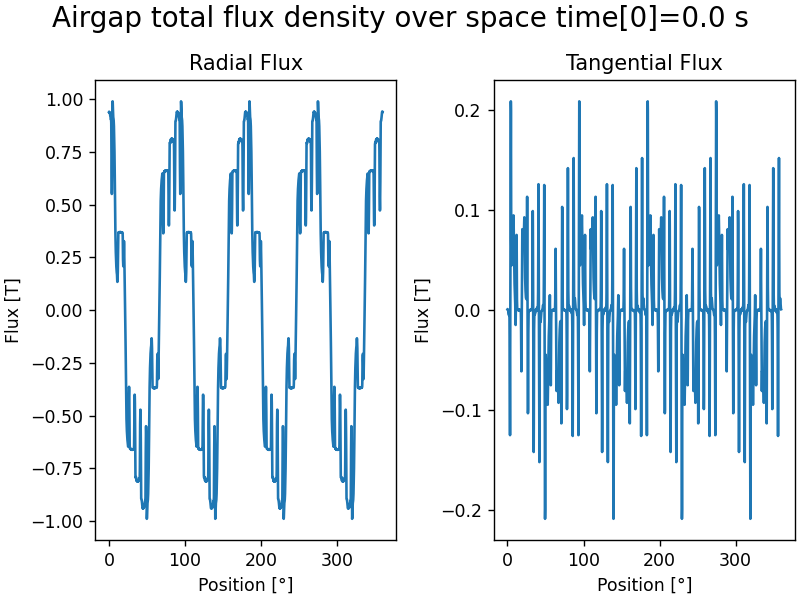

In [8]:
%matplotlib notebook
myResults.plot_B_space()